# Clasificación Supervisada para Predicción de Diabetes

Aplicar técnicas de clasificación supervisada utilizando el algoritmo de árboles de decisión (Decision Tree) sobre un conjunto de datos real de diabetes, desarrollando habilidades para el preprocesamiento de datos, entrenamiento de modelos, análisis de resultados y presentación de conclusiones.

## 1. Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Carga del Dataset

In [2]:
df = pd.read_csv('diabetes.csv')

print(f"""INFORMACIÓN GENERAL DEL DATASET
{'=' * 50}
Dimensiones del dataset: {df.shape}
Columnas: {list(df.columns)}

PRIMERAS 5 FILAS:
{df.head()}

INFORMACIÓN DETALLADA:""")
df.info()

print(f"\nTIPOS DE DATOS:\n{df.dtypes}")

INFORMACIÓN GENERAL DEL DATASET
Dimensiones del dataset: (768, 9)
Columnas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

PRIMERAS 5 FILAS:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

INFORMACIÓN DETALLADA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entri

In [3]:
print(f"""VALORES NULOS:
{'=' * 30}
{df.isnull().sum()}

DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (Outcome):
{'=' * 55}
{df['Outcome'].value_counts()}

Porcentaje de distribución:
{df['Outcome'].value_counts(normalize=True) * 100}

RANGO DE VALORES DE CADA VARIABLE:
{'=' * 45}""")

for col in df.columns:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}")

VALORES NULOS:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (Outcome):
Outcome
0    500
1    268
Name: count, dtype: int64

Porcentaje de distribución:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

RANGO DE VALORES DE CADA VARIABLE:
Pregnancies: min=0, max=17
Glucose: min=0, max=199
BloodPressure: min=0, max=122
SkinThickness: min=0, max=99
Insulin: min=0, max=846
BMI: min=0.0, max=67.1
DiabetesPedigreeFunction: min=0.078, max=2.42
Age: min=21, max=81
Outcome: min=0, max=1


## 3. Análisis Exploratorio de Datos

Análisis detallado de estadísticas descriptivas y identificación de patrones en los datos, incluyendo comparación entre grupos con y sin diabetes.

In [4]:
print(f"""ESTADÍSTICAS DESCRIPTIVAS GENERALES:
{'=' * 50}
{df.describe()}

ESTADÍSTICAS DESCRIPTIVAS POR CLASE (Outcome):
{'=' * 60}
Sin diabetes (0):
{df[df['Outcome'] == 0].describe()}

Con diabetes (1):
{df[df['Outcome'] == 1].describe()}""")

ESTADÍSTICAS DESCRIPTIVAS GENERALES:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951 

In [5]:
columnas_problematicas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print(f"""ANÁLISIS DE VALORES CERO PROBLEMÁTICOS:
{'=' * 50}""")

for col in columnas_problematicas:
    if col in df.columns:
        zeros_count = (df[col] == 0).sum()
        percentage = (zeros_count / len(df)) * 100
        print(f"{col}: {zeros_count} valores cero ({percentage:.2f}% del total)")

print(f"""
NOTA: Estos valores cero son probablemente valores faltantes que deben ser tratados.
Las columnas 'Pregnancies' pueden mantener valores 0 válidos (no embarazos).""")

ANÁLISIS DE VALORES CERO PROBLEMÁTICOS:
Glucose: 5 valores cero (0.65% del total)
BloodPressure: 35 valores cero (4.56% del total)
SkinThickness: 227 valores cero (29.56% del total)
Insulin: 374 valores cero (48.70% del total)
BMI: 11 valores cero (1.43% del total)

NOTA: Estos valores cero son probablemente valores faltantes que deben ser tratados.
Las columnas 'Pregnancies' pueden mantener valores 0 válidos (no embarazos).


## 4. Visualizaciones Exploratorias

Generación de visualizaciones para analizar distribuciones, identificar outliers y examinar correlaciones entre variables.

DISTRIBUCIÓN DE VARIABLES


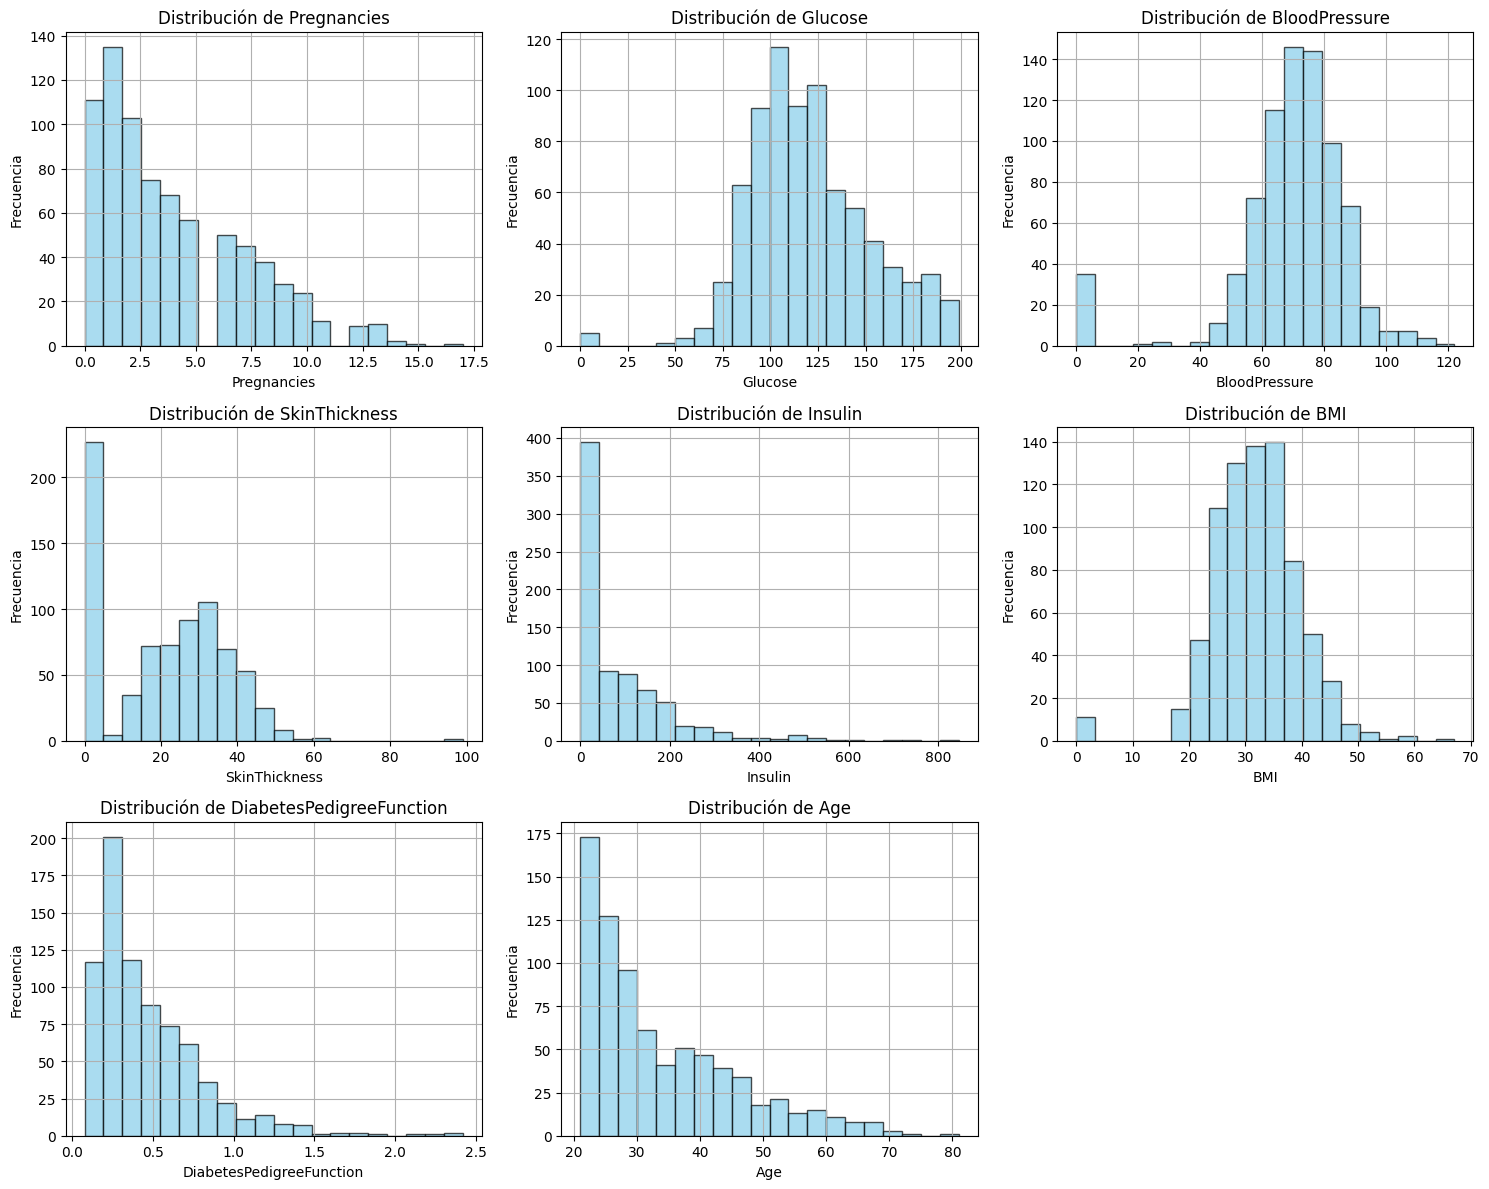

In [6]:
print("DISTRIBUCIÓN DE VARIABLES")

numeric_cols = [col for col in df.columns if col != 'Outcome']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    df[col].hist(bins=20, ax=axes[i], alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

if len(numeric_cols) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

ANÁLISIS DE OUTLIERS CON BOXPLOTS


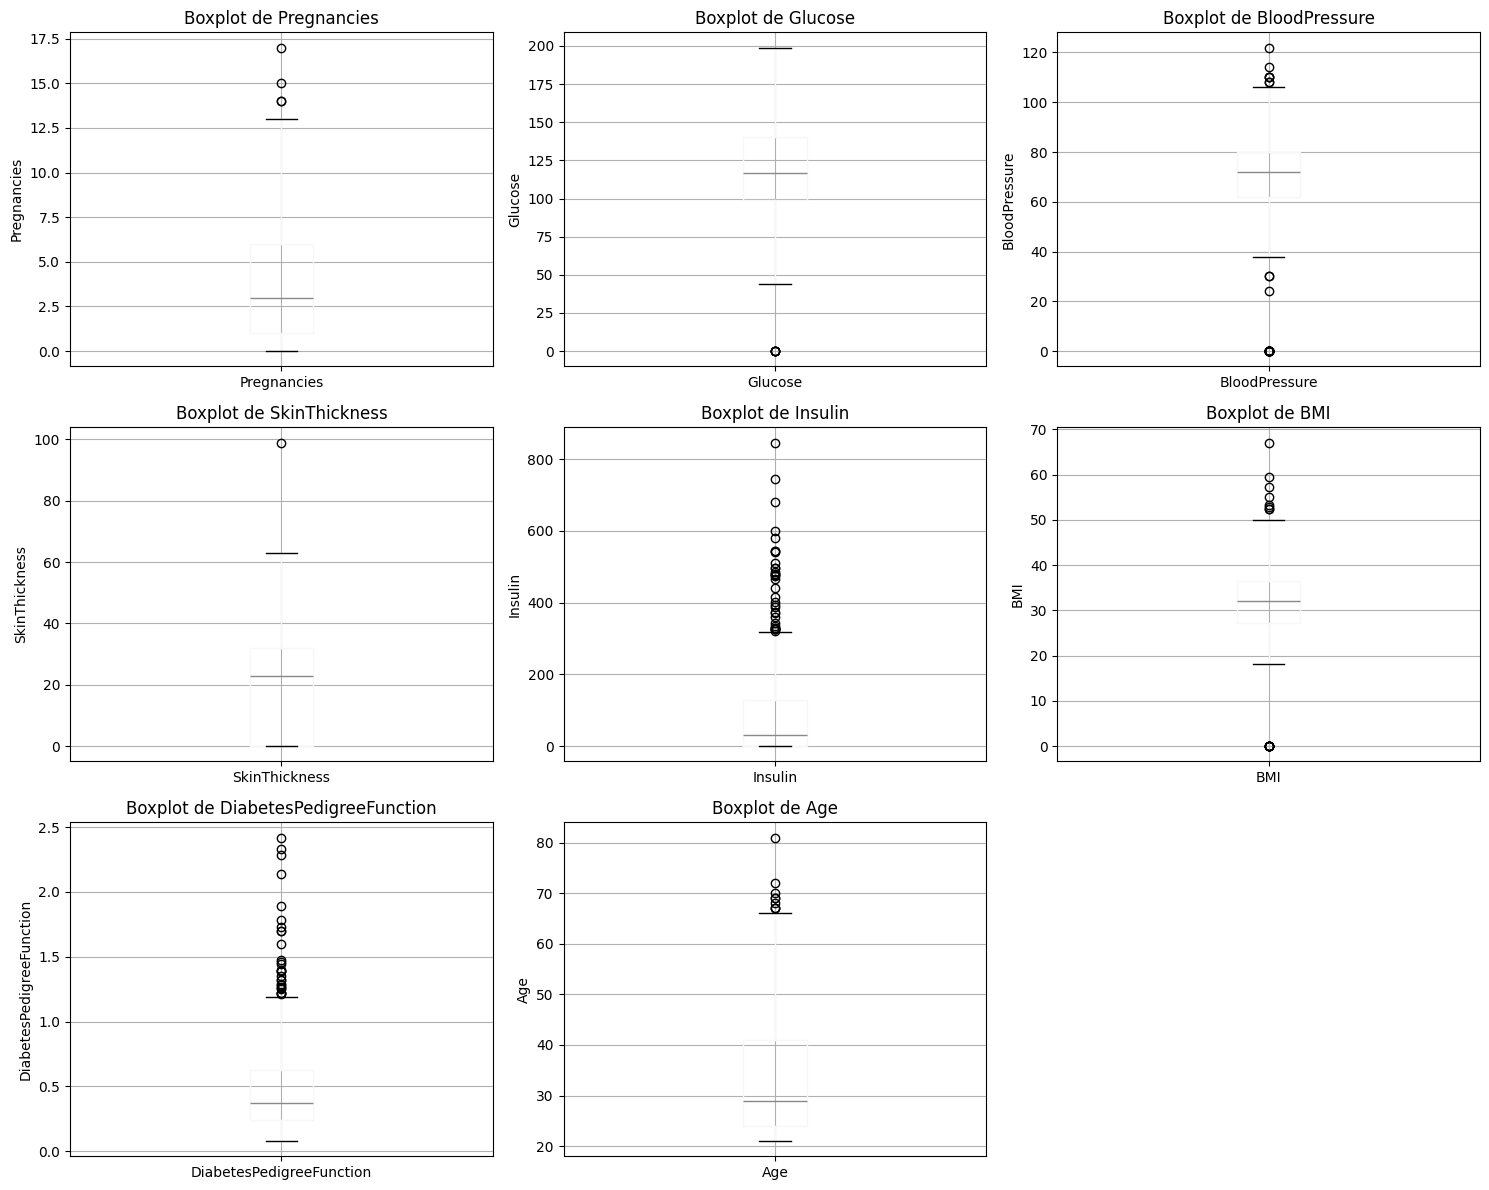

In [7]:
print("ANÁLISIS DE OUTLIERS CON BOXPLOTS")

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel(col)

if len(numeric_cols) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

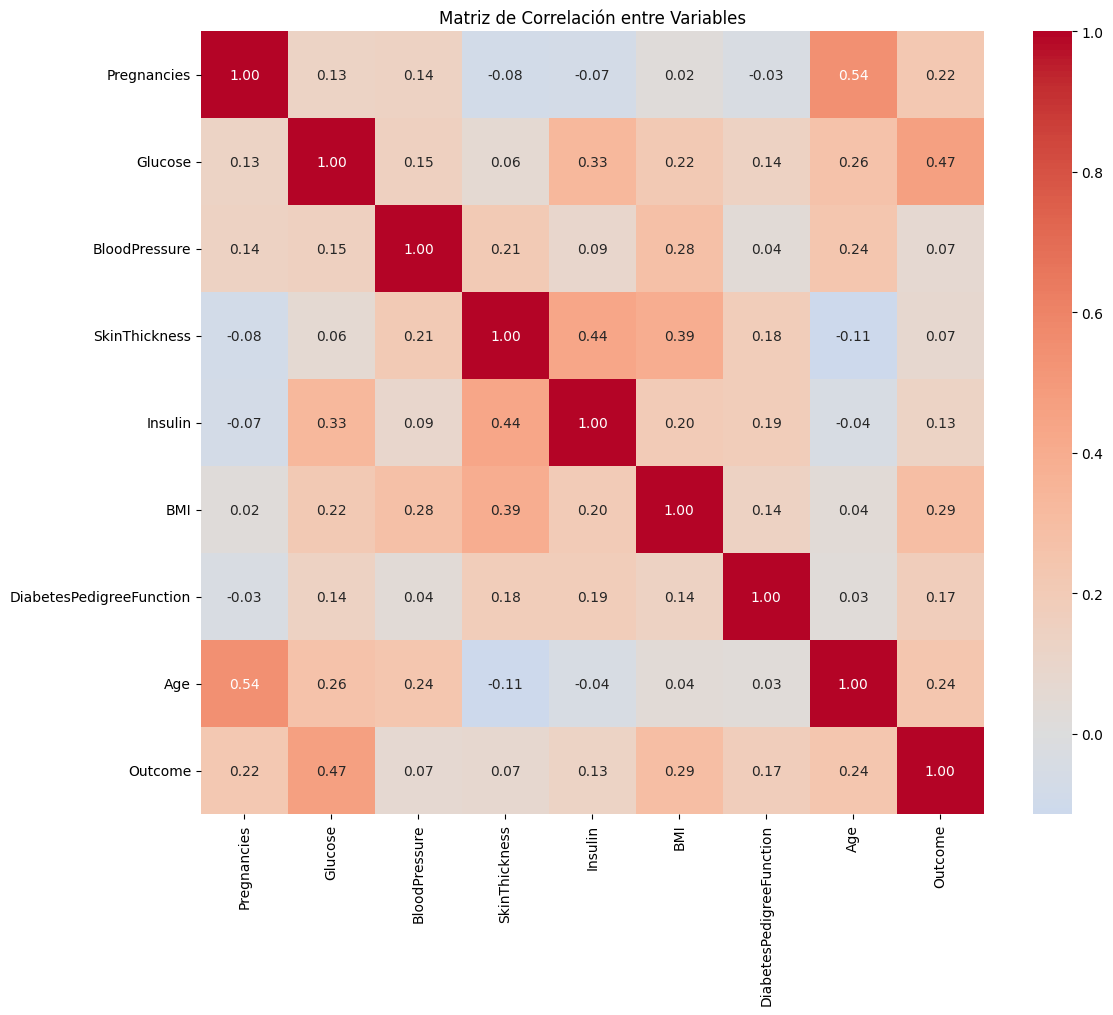


CORRELACIONES CON LA VARIABLE OBJETIVO (Outcome):
Glucose: 0.467
BMI: 0.293
Age: 0.238
Pregnancies: 0.222
DiabetesPedigreeFunction: 0.174
Insulin: 0.131
SkinThickness: 0.075
BloodPressure: 0.065


In [8]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f')
plt.title('Matriz de Correlación entre Variables')
plt.tight_layout()
plt.show()

print(f"""
CORRELACIONES CON LA VARIABLE OBJETIVO (Outcome):
{'=' * 60}""")
correlations_with_target = correlation_matrix['Outcome'].sort_values(ascending=False)
for var, corr in correlations_with_target.items():
    if var != 'Outcome':
        print(f"{var}: {corr:.3f}")

## 5. Preprocesamiento de Datos

Tratamiento de valores cero problemáticos como valores faltantes, seguido de imputación con la media.

In [9]:
df_processed = df.copy()
columnas_problematicas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print(f"""PREPROCESAMIENTO DE DATOS
{'=' * 40}

ANTES DEL PREPROCESAMIENTO:""")

for col in columnas_problematicas:
    if col in df_processed.columns:
        zeros_count = (df_processed[col] == 0).sum()
        print(f"{col}: {zeros_count} valores cero")

print("\nREEMPLAZANDO VALORES 0 POR NaN EN COLUMNAS PROBLEMÁTICAS...")

for col in columnas_problematicas:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].replace(0, np.nan)

print(f"\nVALORES FALTANTES DESPUÉS DEL REEMPLAZO:")
missing_values = df_processed.isnull().sum()
for col, missing in missing_values.items():
    if missing > 0:
        print(f"{col}: {missing} valores faltantes ({(missing/len(df_processed)*100):.2f}%)")

PREPROCESAMIENTO DE DATOS

ANTES DEL PREPROCESAMIENTO:
Glucose: 5 valores cero
BloodPressure: 35 valores cero
SkinThickness: 227 valores cero
Insulin: 374 valores cero
BMI: 11 valores cero

REEMPLAZANDO VALORES 0 POR NaN EN COLUMNAS PROBLEMÁTICAS...

VALORES FALTANTES DESPUÉS DEL REEMPLAZO:
Glucose: 5 valores faltantes (0.65%)
BloodPressure: 35 valores faltantes (4.56%)
SkinThickness: 227 valores faltantes (29.56%)
Insulin: 374 valores faltantes (48.70%)
BMI: 11 valores faltantes (1.43%)


In [10]:
print("IMPUTANDO VALORES FALTANTES CON LA MEDIA...")

medias_imputacion = {}

for col in df_processed.columns:
    if df_processed[col].isnull().any() and col != 'Outcome':
        media = df_processed[col].mean()
        medias_imputacion[col] = media
        df_processed[col] = df_processed[col].fillna(media)
        print(f"{col}: imputado con media = {media:.2f}")

print(f"""
VERIFICACIÓN FINAL - VALORES FALTANTES DESPUÉS DE LA IMPUTACIÓN:
{df_processed.isnull().sum()}

COMPARACIÓN ESTADÍSTICAS ANTES Y DESPUÉS:

ANTES (dataset original):
{df.describe().round(2)}

DESPUÉS (dataset procesado):
{df_processed.describe().round(2)}""")

IMPUTANDO VALORES FALTANTES CON LA MEDIA...
Glucose: imputado con media = 121.69
BloodPressure: imputado con media = 72.41
SkinThickness: imputado con media = 29.15
Insulin: imputado con media = 155.55
BMI: imputado con media = 32.46

VERIFICACIÓN FINAL - VALORES FALTANTES DESPUÉS DE LA IMPUTACIÓN:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

COMPARACIÓN ESTADÍSTICAS ANTES Y DESPUÉS:

ANTES (dataset original):
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       768.00   768.00         768.00         768.00   768.00  768.00   
mean          3.85   120.89          69.11          20.54    79.80   31.99   
std           3.37    31.97          19.36          15.95   115.24    7.88   
min           0.00     0.00        

## 6. División del Dataset

División de los datos en conjuntos de entrenamiento y prueba con proporción 70-30, manteniendo la estratificación por clases.

In [11]:
X = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']

print(f"""DIVISIÓN DEL DATASET
{'=' * 30}
Variables predictoras (X): {X.shape}
Variable objetivo (y): {y.shape}
Nombres de las variables predictoras: {list(X.columns)}

DIVIDIENDO EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA (70-30)...""")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

print(f"""
DIVISIÓN COMPLETADA:
Conjunto de entrenamiento - X_train: {X_train.shape}, y_train: {y_train.shape}
Conjunto de prueba - X_test: {X_test.shape}, y_test: {y_test.shape}

DISTRIBUCIÓN DE CLASES:
Conjunto de entrenamiento:
{y_train.value_counts(normalize=True) * 100}

Conjunto de prueba:
{y_test.value_counts(normalize=True) * 100}""")

DIVISIÓN DEL DATASET
Variables predictoras (X): (768, 8)
Variable objetivo (y): (768,)
Nombres de las variables predictoras: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

DIVIDIENDO EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA (70-30)...

DIVISIÓN COMPLETADA:
Conjunto de entrenamiento - X_train: (537, 8), y_train: (537,)
Conjunto de prueba - X_test: (231, 8), y_test: (231,)

DISTRIBUCIÓN DE CLASES:
Conjunto de entrenamiento:
Outcome
0    65.176909
1    34.823091
Name: proportion, dtype: float64

Conjunto de prueba:
Outcome
0    64.935065
1    35.064935
Name: proportion, dtype: float64


## 7. Entrenamiento del Modelo - Árbol de Decisión

Entrenamiento del modelo principal usando DecisionTreeClassifier con parámetros de regularización para evitar overfitting.

In [12]:
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10
)

print(f"""ENTRENAMIENTO DEL ÁRBOL DE DECISIÓN
{'=' * 45}

Configuración del modelo:
- random_state: 42
- max_depth: 5
- min_samples_split: 20
- min_samples_leaf: 10

Entrenando el modelo...""")

dt_model.fit(X_train, y_train)
print("Modelo entrenado exitosamente")

print("\nRealizando predicciones...")
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
print("Predicciones completadas")

ENTRENAMIENTO DEL ÁRBOL DE DECISIÓN

Configuración del modelo:
- random_state: 42
- max_depth: 5
- min_samples_split: 20
- min_samples_leaf: 10

Entrenando el modelo...
Modelo entrenado exitosamente

Realizando predicciones...
Predicciones completadas


## 8. Evaluación del Modelo

Evaluación completa del rendimiento usando métricas de precisión, matriz de confusión y visualización del árbol de decisión.

In [13]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
difference = train_accuracy - test_accuracy

overfitting_status = "Posible overfitting detectado" if difference > 0.05 else "No hay overfitting significativo"

print(f"""EVALUACIÓN DEL RENDIMIENTO
{'=' * 35}

PRECISIÓN (ACCURACY):
Entrenamiento: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)
Prueba: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)

Diferencia (Training - Test): {difference:.4f}
{overfitting_status}

REPORTE DE CLASIFICACIÓN DETALLADO:
{'=' * 50}
CONJUNTO DE ENTRENAMIENTO:
{classification_report(y_train, y_train_pred)}

CONJUNTO DE PRUEBA:
{classification_report(y_test, y_test_pred)}""")

EVALUACIÓN DEL RENDIMIENTO

PRECISIÓN (ACCURACY):
Entrenamiento: 0.8194 (81.94%)
Prueba: 0.7619 (76.19%)

Diferencia (Training - Test): 0.0575
Posible overfitting detectado

REPORTE DE CLASIFICACIÓN DETALLADO:
CONJUNTO DE ENTRENAMIENTO:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       350
           1       0.76      0.70      0.73       187

    accuracy                           0.82       537
   macro avg       0.80      0.79      0.80       537
weighted avg       0.82      0.82      0.82       537


CONJUNTO DE PRUEBA:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.70      0.57      0.63        81

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



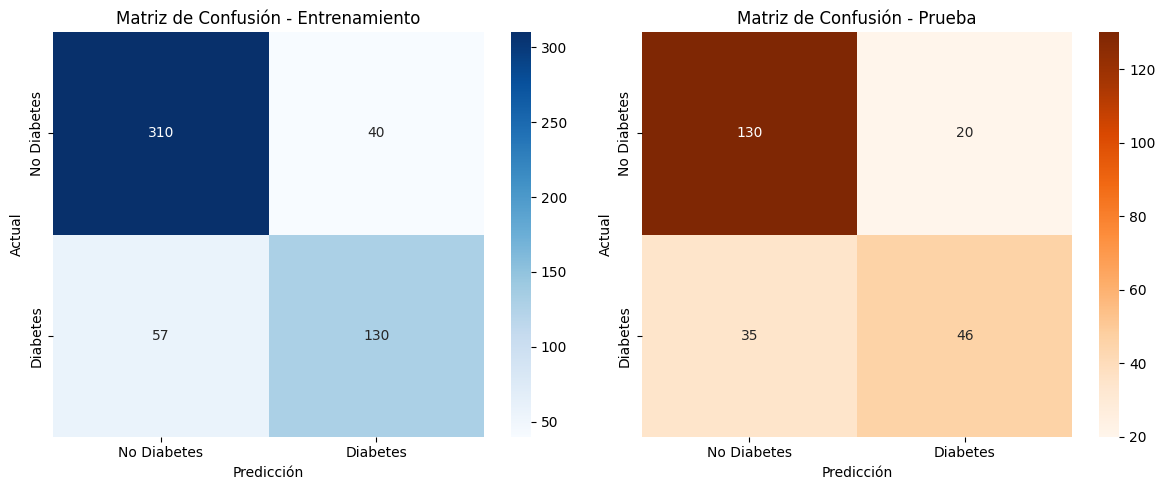

Matriz de confusión - Entrenamiento:
VP: 130, VN: 310, FP: 40, FN: 57

Matriz de confusión - Prueba:
VP: 46, VN: 130, FP: 20, FN: 35


In [14]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Matriz de Confusión - Entrenamiento')
ax1.set_xlabel('Predicción')
ax1.set_ylabel('Actual')
ax1.set_xticklabels(['No Diabetes', 'Diabetes'])
ax1.set_yticklabels(['No Diabetes', 'Diabetes'])

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges', ax=ax2)
ax2.set_title('Matriz de Confusión - Prueba')
ax2.set_xlabel('Predicción')
ax2.set_ylabel('Actual')
ax2.set_xticklabels(['No Diabetes', 'Diabetes'])
ax2.set_yticklabels(['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

print(f"""Matriz de confusión - Entrenamiento:
VP: {cm_train[1,1]}, VN: {cm_train[0,0]}, FP: {cm_train[0,1]}, FN: {cm_train[1,0]}

Matriz de confusión - Prueba:
VP: {cm_test[1,1]}, VN: {cm_test[0,0]}, FP: {cm_test[0,1]}, FN: {cm_test[1,0]}""")

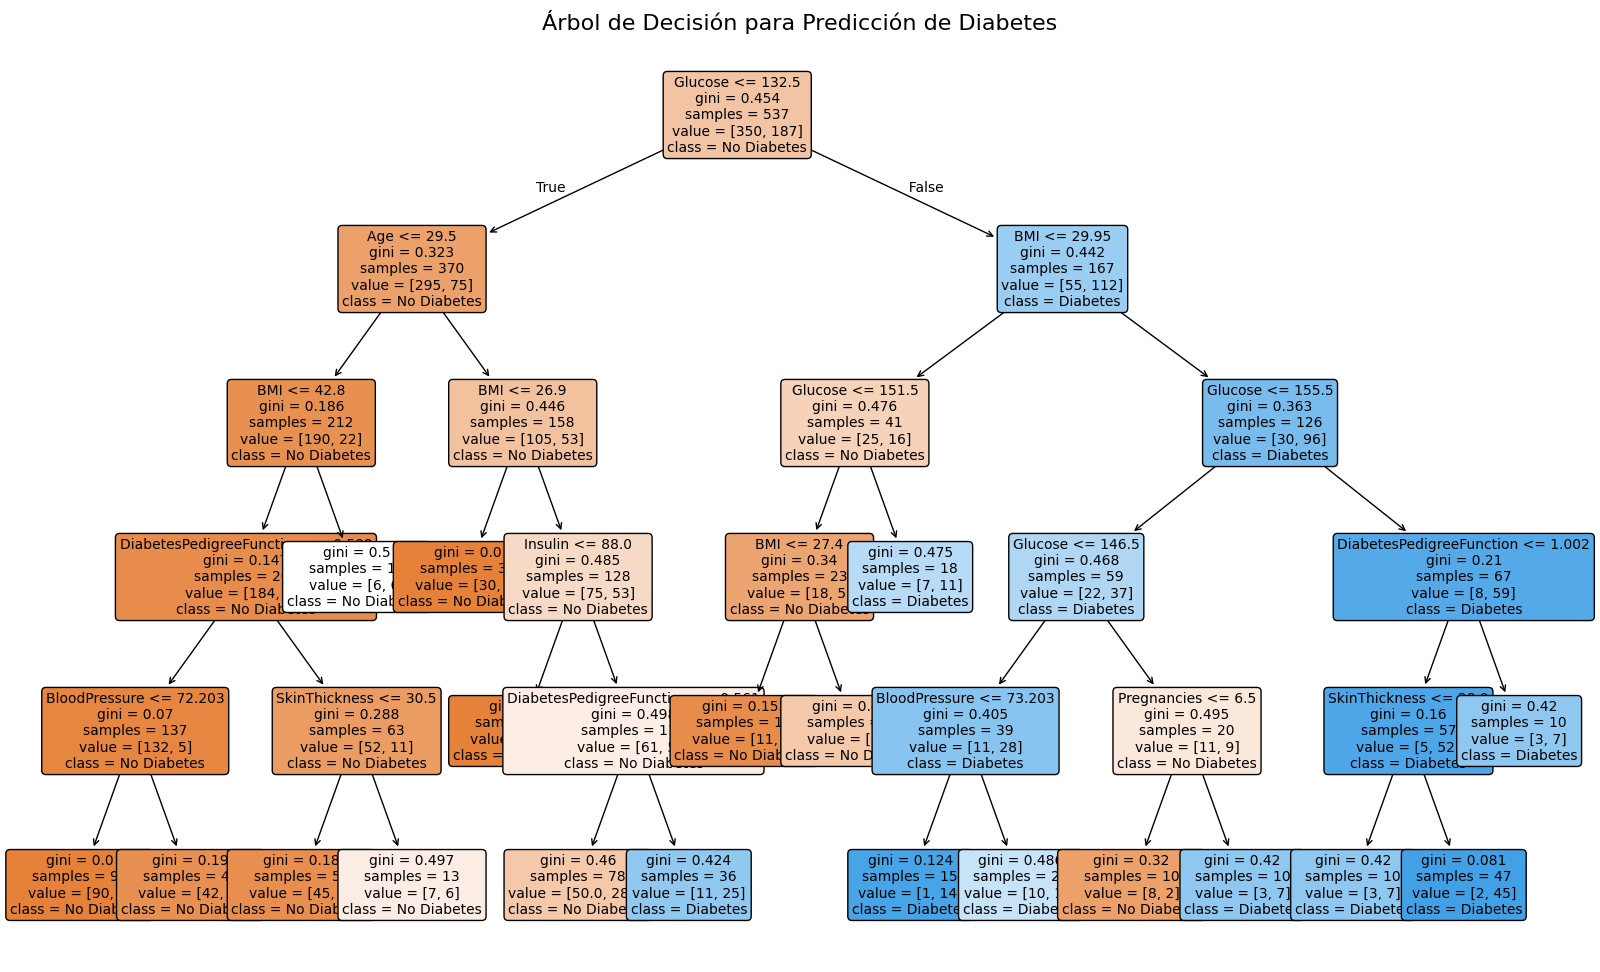


IMPORTANCIA DE LAS CARACTERÍSTICAS:
             caracteristica  importancia
1                   Glucose     0.523621
5                       BMI     0.191777
7                       Age     0.085583
6  DiabetesPedigreeFunction     0.070078
4                   Insulin     0.047471
3             SkinThickness     0.033380
2             BloodPressure     0.026072
0               Pregnancies     0.022018


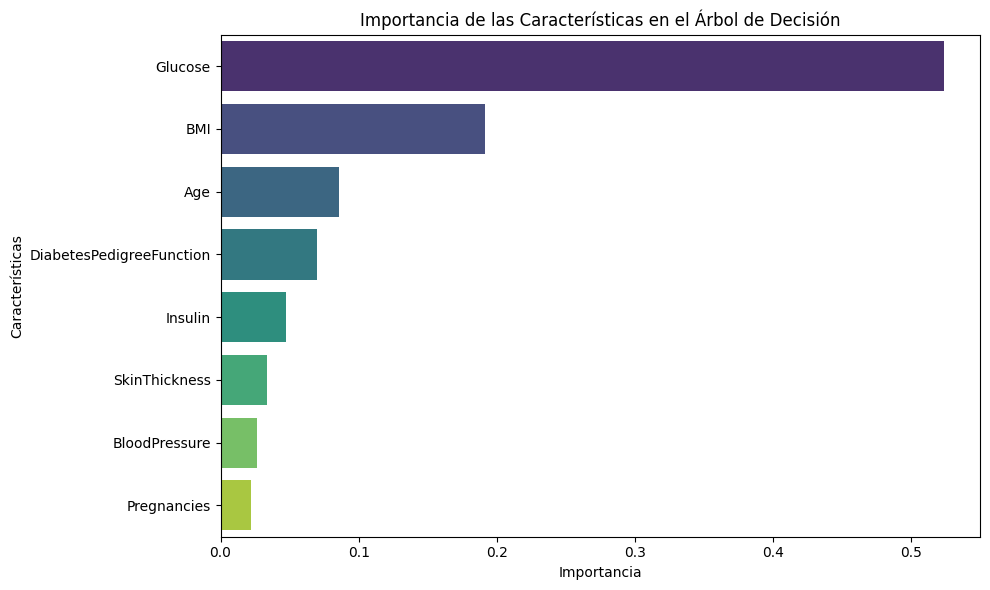

In [15]:
plt.figure(figsize=(20, 12))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['No Diabetes', 'Diabetes'],
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title('Árbol de Decisión para Predicción de Diabetes', fontsize=16)
plt.show()

feature_importance = pd.DataFrame({
    'caracteristica': X.columns,
    'importancia': dt_model.feature_importances_
}).sort_values('importancia', ascending=False)

print(f"""
IMPORTANCIA DE LAS CARACTERÍSTICAS:
{'=' * 45}
{feature_importance}""")

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importancia', y='caracteristica', hue='caracteristica', palette='viridis', legend=False)
plt.title('Importancia de las Características en el Árbol de Decisión')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

## 9. Modelos Alternativos

Implementación y evaluación de modelos alternativos para comparar rendimiento y determinar el modelo más adecuado.

In [16]:
models_results = {}

print(f"""IMPLEMENTANDO MODELOS ALTERNATIVOS
{'=' * 45}""")

print("\n1. RANDOM FOREST\n" + "-" * 20)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
models_results['Random Forest'] = rf_accuracy
print(f"Precisión Random Forest: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")

print("\n2. REGRESIÓN LOGÍSTICA\n" + "-" * 25)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
models_results['Regresión Logística'] = lr_accuracy
print(f"Precisión Regresión Logística: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")

print("\n3. NAIVE BAYES\n" + "-" * 15)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
models_results['Naive Bayes'] = nb_accuracy
print(f"Precisión Naive Bayes: {nb_accuracy:.4f} ({nb_accuracy*100:.2f}%)")

models_results['Árbol de Decisión'] = test_accuracy

print(f"""
RESUMEN DE RESULTADOS:
{'=' * 35}""")
for model, accuracy in sorted(models_results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {accuracy:.4f} ({accuracy*100:.2f}%)")

IMPLEMENTANDO MODELOS ALTERNATIVOS

1. RANDOM FOREST
--------------------
Precisión Random Forest: 0.7403 (74.03%)

2. REGRESIÓN LOGÍSTICA
-------------------------
Precisión Regresión Logística: 0.7403 (74.03%)

3. NAIVE BAYES
---------------
Precisión Naive Bayes: 0.7273 (72.73%)

RESUMEN DE RESULTADOS:
Árbol de Decisión: 0.7619 (76.19%)
Random Forest: 0.7403 (74.03%)
Regresión Logística: 0.7403 (74.03%)
Naive Bayes: 0.7273 (72.73%)


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

models_detailed_results = {}

dt_precision = precision_score(y_test, y_test_pred, average='weighted')
dt_recall = recall_score(y_test, y_test_pred, average='weighted')
dt_f1 = f1_score(y_test, y_test_pred, average='weighted')
models_detailed_results['Árbol de Decisión'] = {
    'Accuracy': test_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'F1-Score': dt_f1
}

rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
models_detailed_results['Random Forest'] = {
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1-Score': rf_f1
}

lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_pred, average='weighted')
models_detailed_results['Regresión Logística'] = {
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'F1-Score': lr_f1
}

nb_precision = precision_score(y_test, nb_pred, average='weighted')
nb_recall = recall_score(y_test, nb_pred, average='weighted')
nb_f1 = f1_score(y_test, nb_pred, average='weighted')
models_detailed_results['Naive Bayes'] = {
    'Accuracy': nb_accuracy,
    'Precision': nb_precision,
    'Recall': nb_recall,
    'F1-Score': nb_f1
}

comparison_df = pd.DataFrame(models_detailed_results).T
comparison_df = comparison_df.round(4)

print(f"""EVALUACIÓN COMPARATIVA DETALLADA
{'=' * 45}

TABLA COMPARATIVA DE MÉTRICAS:
{comparison_df}

ANÁLISIS POR MÉTRICA:
Mejor Accuracy: {comparison_df['Accuracy'].idxmax()} ({comparison_df['Accuracy'].max():.4f})
Mejor Precision: {comparison_df['Precision'].idxmax()} ({comparison_df['Precision'].max():.4f})
Mejor Recall: {comparison_df['Recall'].idxmax()} ({comparison_df['Recall'].max():.4f})
Mejor F1-Score: {comparison_df['F1-Score'].idxmax()} ({comparison_df['F1-Score'].max():.4f})""")

EVALUACIÓN COMPARATIVA DETALLADA

TABLA COMPARATIVA DE MÉTRICAS:
                     Accuracy  Precision  Recall  F1-Score
Árbol de Decisión      0.7619     0.7560  0.7619    0.7554
Random Forest          0.7403     0.7322  0.7403    0.7301
Regresión Logística    0.7403     0.7327  0.7403    0.7326
Naive Bayes            0.7273     0.7251  0.7273    0.7260

ANÁLISIS POR MÉTRICA:
Mejor Accuracy: Árbol de Decisión (0.7619)
Mejor Precision: Árbol de Decisión (0.7560)
Mejor Recall: Árbol de Decisión (0.7619)
Mejor F1-Score: Árbol de Decisión (0.7554)


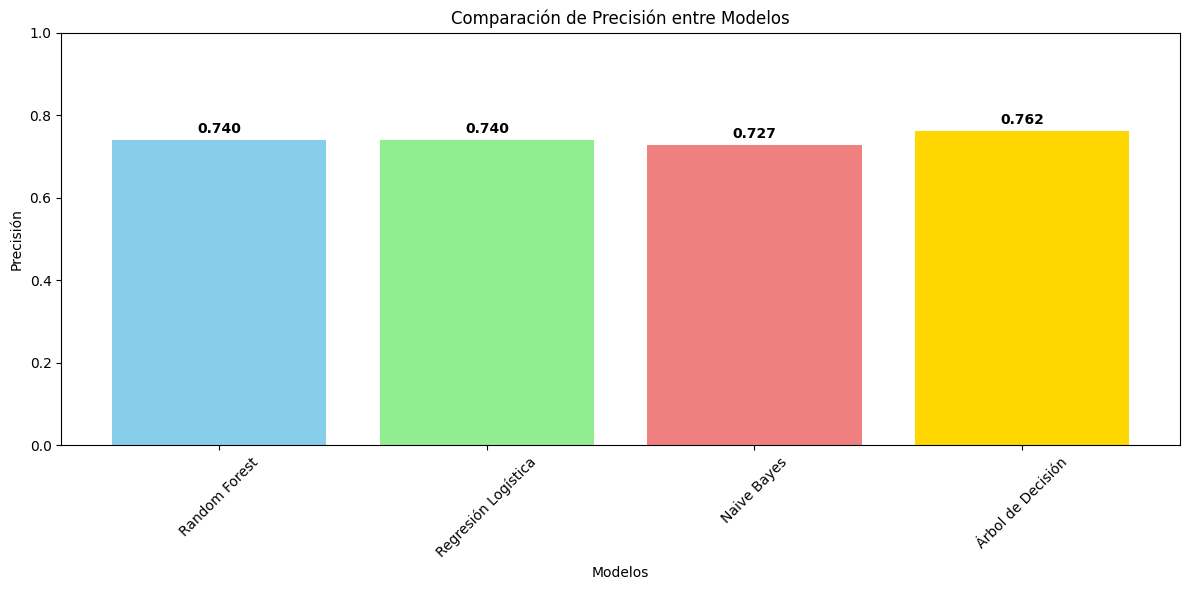

In [18]:
models_df = pd.DataFrame(list(models_results.items()), columns=['Modelo', 'Precisión'])

plt.figure(figsize=(12, 6))
bars = plt.bar(models_df['Modelo'], models_df['Precisión'], 
               color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Comparación de Precisión entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.ylim(0, 1)

for bar, precision in zip(bars, models_df['Precisión']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{precision:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 10. Conclusiones y Especificación del Modelo Más Adecuado

Análisis final de resultados y especificación del modelo más adecuado según los criterios de evaluación del PRD.

In [19]:
best_model_name = max(models_results, key=models_results.get)
best_accuracy = models_results[best_model_name]
criterion_met = "cumple" if best_accuracy >= 0.70 else "NO cumple"

print(f"""ESPECIFICACIÓN DEL MODELO MÁS ADECUADO
{'=' * 50}

MODELO SELECCIONADO: {best_model_name}
Precisión alcanzada: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)

CRITERIO DE ÉXITO (≥70%): {criterion_met}""")

ESPECIFICACIÓN DEL MODELO MÁS ADECUADO

MODELO SELECCIONADO: Árbol de Decisión
Precisión alcanzada: 0.7619 (76.19%)

CRITERIO DE ÉXITO (≥70%): cumple
